# **Candy Dataset**

The main dataset below is filtered to not include any columns not relevant to their opinions on candy (excluding gender, location, and age). The opinions are how they feel if they received a certain type of candy during Halloween. However, any other filtering is not yet applied.

---



In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

path = "./data/"
filename_read = os.path.join(path,"candyhierarchy2017.csv")
drop_cols = ['Internal ID','Q1: GOING OUT?',"Q5: STATE, PROVINCE, COUNTY, ETC",'Q7: JOY OTHER',
        'Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q10: DRESS',
        'Q11: DAY','Q12: MEDIA [Daily Dish]','Q12: MEDIA [Science]',
        'Q12: MEDIA [ESPN]','Q12: MEDIA [Yahoo]','Click Coordinates (x, y)',
        'Q6 | Bonkers (the board game)','Q6 | Cash, or other forms of legal tender',
        'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
        'Q6 | Real Housewives of Orange County Season 9 Blue-Ray',
        'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
        'Q6 | White Bread','Q6 | Trail Mix','Q6 | Sandwich-sized bags filled with BooBerry Crunch',
        'Q6 | Glow sticks',"Q6 | Box'o'Raisins",'Q6 | Hugs (actual physical hugs)',
        "Q6 | Abstained from M&M'ing.",'Q6 | Minibags of chips','Q6 | Whole Wheat anything',
        'Unnamed: 113','Q6 | Broken glow stick','Q6 | Creepy Religious comics/Chick Tracts',
        'Q6 | Generic Brand Acetaminophen','Q6 | Healthy Fruit','Q6 | Kale smoothie',"Q6 | Blue M&M's",
        "Q6 | Red M&M's","Q6 | Green Party M&M's","Q6 | Independent M&M's",'Q6 | Pencils',
        'Q6 | Spotted Dick','Q6 | Tolberone something or other','Q6 | Vicodin']

col_names = ['gender','age','country','100 Grand Bar',
             'Mary Janes','Any Full-Sized Candy Bar','Black Jacks','Bonkers',
             'Bottle Caps','Butterfinger','Cadbury Creme Eggs','Candy Corn',
             'Caramellos','Chardonnay','Chick-o-Sticks','Chicklets','Coffee Crisp',
             'Dental paraphenalia','Dots','Dove Bars','Fuzzy Peaches','Goo Goo Clusters',
             "Good n' Plenty",'Baseball Card Gum','Gummy Bears','Hard Candy','Heath Bar',
             'Hershey Dark Chocolate','Hershey Milk Chocolate','Hershey Kisses','Jolly Rancher (bad)',
             'Jolly Rancher (good)','JoyJoy','Junior Mints','Senior Mints','Kinder Happy Hippo',
             'Kit Kat','LaffyTaffy','LemonHeads','Licorice (no black)','Licorice (black)',
             'Lindt Truffle','Lollipops','Mars','Maynards','Mike and Ike','Milk Duds','Milky Way',
             'Regular M&Ms','Peanut M&Ms','Mint Kisses','Mint Juleps','Mr. Goodbar','Necco Wafers',
             'Nerds','Nestle Crunch',"Now'n'Laters",'Peeps','Pixy Stix',"Reese's Cups","Reese's Pieces",
             'Reggie Jackson Bar','Rolos','Skittles','Smarties (US)','Smarties (Commonwealth)',
             'Snickers','Sourpatch Kids','Starburst','Sweet Tarts','Swedish Fish',
             'Sweetums','Take','Tic Tacs','Marshmellow Circus Peanuts','Three Musketeers',
             'Twix','Whatchamacallit Bars','York Peppermint Patties']

candy = pd.read_csv(filename_read, na_values=['NA','?'], encoding="ISO-8859-1");
candy.drop(drop_cols,inplace=True,axis=1)
candy.columns = col_names;

print('Number of instances = %d' % (candy.shape[0]))
print('Number of attributes = %d' % (candy.shape[1]))
print('Number of missing values:')
for col in candy.columns:
    print('\t%s: %d' % (col,candy[col].isna().sum()))

Number of instances = 2460
Number of attributes = 79
Number of missing values:
	gender: 41
	age: 85
	country: 64
	100 Grand Bar: 747
	Mary Janes: 734
	Any Full-Sized Candy Bar: 672
	Black Jacks: 958
	Bonkers: 992
	Bottle Caps: 765
	Butterfinger: 682
	Cadbury Creme Eggs: 683
	Candy Corn: 678
	Caramellos: 752
	Chardonnay: 743
	Chick-o-Sticks: 946
	Chicklets: 711
	Coffee Crisp: 853
	Dental paraphenalia: 692
	Dots: 729
	Dove Bars: 702
	Fuzzy Peaches: 823
	Goo Goo Clusters: 879
	Good n' Plenty: 734
	Baseball Card Gum: 716
	Gummy Bears: 697
	Hard Candy: 695
	Heath Bar: 712
	Hershey Dark Chocolate: 673
	Hershey Milk Chocolate: 672
	Hershey Kisses: 678
	Jolly Rancher (bad): 694
	Jolly Rancher (good): 695
	JoyJoy: 1026
	Junior Mints: 698
	Senior Mints: 942
	Kinder Happy Hippo: 945
	Kit Kat: 674
	LaffyTaffy: 736
	LemonHeads: 730
	Licorice (no black): 686
	Licorice (black): 685
	Lindt Truffle: 718
	Lollipops: 691
	Mars: 725
	Maynards: 1024
	Mike and Ike: 729
	Milk Duds: 693
	Milky Way: 688
	Regul

### Reducing Data Set to our Focus

In [ ]:
# too many columns to work with (and also too many to print out)
candy.head();

In [ ]:
# way too many NaN values that may affect our data
print(candy.isna().sum().sort_values(ascending=True).head(40))

gender                       41
country                      64
age                          85
Peanut M&Ms                 671
Any Full-Sized Candy Bar    672
Hershey Milk Chocolate      672
Hershey Dark Chocolate      673
Kit Kat                     674
Regular M&Ms                675
Candy Corn                  678
Hershey Kisses              678
Reese's Cups                679
Butterfinger                682
Cadbury Creme Eggs          683
Licorice (black)            685
Licorice (no black)         686
Milky Way                   688
Twix                        690
Snickers                    690
Reese's Pieces              691
Lollipops                   691
Dental paraphenalia         692
Starburst                   693
Milk Duds                   693
Jolly Rancher (bad)         694
Hard Candy                  695
Jolly Rancher (good)        695
Gummy Bears                 697
Nestle Crunch               698
Junior Mints                698
Dove Bars                   702
York Pep

In [ ]:
# main manipulated dataset
candyMain = candy

# NOTE: we excluded state, province, etc since it's associated with country
reducedCandy = ['gender','age','country', 'Hershey Milk Chocolate','Gummy Bears','Skittles', "Reese's Cups",
             'Butterfinger','Kit Kat', 'Peanut M&Ms']
candyMain = candyMain.filter(reducedCandy)
candyMain.head()

,gender,age,country,Hershey Milk Chocolate,Gummy Bears,Skittles,Reese's Cups,Butterfinger,Kit Kat,Peanut M&Ms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,44,USA,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH
2,Male,49,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,40,us,MEH,JOY,DESPAIR,JOY,MEH,MEH,JOY
4,Male,23,usa,MEH,JOY,JOY,JOY,MEH,JOY,JOY


### Fixing Country Column Names

In [ ]:
# variations in current dataset (decided to exclude a few USA participants since it's not worth filtering for their response)
usa = ['usa','us','united states', 'the united states', 'u.s.'
       'murica','u.s.a.',"'merica",'murrika', 'united states of america',
       'united states', 'usa ', 'united states ', 'unied states',
       'united states of america ','united state','united staes',
       'america','united stated','united sates','the united states of america',
       'unites states','us of a']
canada = ['canada ','canada','canada`']

# finding Series with these variations
usaSubset = candyMain['country'].str.lower().isin(usa)
usaSubset2 = candyMain['country'].isin(['U.S.','U S','unite states','USAUSAUSA','u.s.','Murica'])
canadaSubset = candyMain['country'].str.lower().isin(canada)

# updating the column values (only focusing on the countries with the most participants)
candyMain.loc[usaSubset,'country'] = 'USA'
candyMain.loc[usaSubset2,'country'] = 'USA'
candyMain.loc[canadaSubset,'country'] = 'Canada'

# there are a lot more records, but decided to just display only 10 records to get a general idea
coolcountries = ['USA','Canada']
candyMain = candyMain[candyMain['country'].isin(coolcountries) == True]
print(candyMain['country'].value_counts().sort_values(ascending=False))

USA       2026
Canada     225
Name: country, dtype: int64


### Converting Age Column to Numeric & Filling in Age Columns with Non-Numeric Values

In [ ]:
import collections.abc
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

# makes age column numeric & forces non-numeric values to be NaN
candyMain['age'] = pd.to_numeric(candyMain['age'], errors='coerce')
# fills in missing numeric values with median of age  
missing_median(candyMain,'age')

print(candyMain['age'].isnull().sum())

0


### Before Removing Age Outliers Box Plot

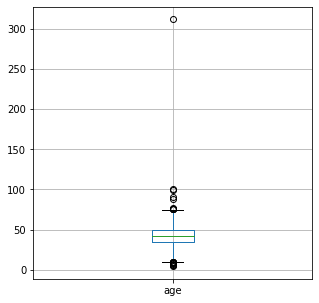

In [ ]:
import numpy as np
%matplotlib inline

outlierBoxplot = candyMain.filter(['age'])
outlierBoxplot.boxplot(figsize=(5,5))


### Removing Age Outliers

In [ ]:
# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)

# sd = 2.5 standard deviations away from mean to remove outlier
remove_outliers(candyMain,'age',2.5)
print("MAX AGE: %d" % candyMain['age'].max())
print("MIN AGE: %d" % candyMain['age'].min())     #min when sd = 2 was 4, which didn't make sense

MAX AGE: 75
MIN AGE: 10


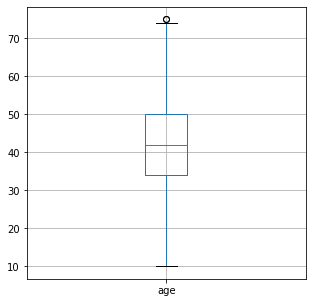

In [ ]:
noOutlierBoxplot = candyMain.filter(['age'])
noOutlierBoxplot.boxplot(figsize=(5,5))

### Grouping by Age Groups

In [ ]:
# function to create new column for each age group
def age_grouping(df):
  df.loc[df['age'] <= 15, 'age_group'] = 'Kid'
  df.loc[df['age'].between(15,17), 'age_group'] = 'Teenager'
  df.loc[df['age'].between(18,25), 'age_group'] = 'Young Adult'
  df.loc[df['age'].between(26,39), 'age_group'] = 'Adult'
  df.loc[df['age'].between(40,59), 'age_group'] = 'Middle Age Adult'
  df.loc[df['age'] >= 60, 'age_group'] = 'Senior'

age_grouping(candyMain)

print(candyMain['age_group'].value_counts().sort_values(ascending=False).head(10))

Middle Age Adult    1130
Adult                813
Senior               172
Young Adult           83
Kid                   20
Teenager              14
Name: age_group, dtype: int64


### Removing Duplicates

In [ ]:
# no duplicates were found in the data set
print('# OF INSTANCES BEFORE DROP: %d' % (candyMain.shape[0]))

candyMain.drop_duplicates()

print('# OF INSTANCES AFTER DROP: %d' % (candyMain.shape[0]))

# OF INSTANCES BEFORE DROP: 2233
# OF INSTANCES AFTER DROP: 2233


### Removing NaN Values (that were not able to be filled)

In [ ]:
candyMain = candyMain.dropna();
print('Number of instances = %d' % (candyMain.shape[0]))
print('Number of missing values:')
for col in candyMain.columns:
    print('\t%s: %d' % (col,candyMain[col].isna().sum()))

Number of instances = 1592
Number of missing values:
	gender: 0
	age: 0
	country: 0
	Hershey Milk Chocolate: 0
	Gummy Bears: 0
	Skittles: 0
	Reese's Cups: 0
	Butterfinger: 0
	Kit Kat: 0
	Peanut M&Ms: 0
	age_group: 0


### Changing Ordinal Values From Strings to Integers (label encoding)

In [ ]:
kitkat = candyMain.filter(['gender','age','country','Kit Kat'])
print('Number of instances = %d' % (kitkat.shape[0]))
print('Number of attributes = %d' % (kitkat.shape[1]))
kitkat.head()

Number of instances = 1592
Number of attributes = 4


,gender,age,country,Kit Kat
1,Male,44.0,USA,JOY
3,Male,40.0,USA,MEH
4,Male,23.0,USA,JOY
7,Male,33.0,Canada,MEH
8,Male,40.0,Canada,JOY


In [ ]:
# just for learning; can't do numerical operations on these values since it's all ordinal data
opinionMapping = {'JOY': 3, 'MEH': 2, 'DESPAIR':1}
kitkatTest = kitkat
for col in kitkatTest.columns:
  if col!='gender' and col!='age' and col!='country':
    kitkatTest[col]=kitkatTest[col].map(opinionMapping)
kitkatTest.head()

,gender,age,country,Kit Kat
1,Male,44.0,USA,3
3,Male,40.0,USA,2
4,Male,23.0,USA,3
7,Male,33.0,Canada,2
8,Male,40.0,Canada,3


### Taking Care of Outliers

In [ ]:
print(candyMain['country'].value_counts().sort_values(ascending=False).head(10))

USA       1447
Canada     145
Name: country, dtype: int64


In [ ]:
print(candyMain['age'].value_counts().sort_values(ascending=True).head(30)) #highlights outliers
print(candyMain.isnull().sum().sort_values(ascending=False).head(10)) #top 10 most null categories
simp_frequent = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')
newCandy = pd.DataFrame(data=simp_frequent.fit_transform(candy), columns=candy.columns) 
#creates newCandy DataFrame; Same as candy but has all null filled in with most frequent of that column
print(newCandy['country'].value_counts().sort_values(ascending=False).head(10)) #shows top 10 most countries, slightly fixed, still need to fix all the different spellings of US
print(newCandy.isnull().sum().sort_values(ascending=False).head(10)) #top 10 most null categories

16.0     1
74.0     1
17.0     1
14.0     1
73.0     2
75.0     2
69.0     2
72.0     2
19.0     2
10.0     2
70.0     3
67.0     3
15.0     4
11.0     4
13.0     4
23.0     4
71.0     4
20.0     6
68.0     6
66.0     6
21.0     6
18.0     6
12.0     7
65.0     8
22.0     8
24.0    10
25.0    10
64.0    11
62.0    13
63.0    13
Name: age, dtype: int64
gender                    0
age                       0
country                   0
Hershey Milk Chocolate    0
Gummy Bears               0
Skittles                  0
Reese's Cups              0
Butterfinger              0
Kit Kat                   0
Peanut M&Ms               0
dtype: int64
USA                         763
United States               497
usa                         217
Canada                      179
Usa                         139
US                          126
USA                          73
United States of America     57
us                           40
united states                38
Name: country, dtype: int64
gende

In [ ]:
candyMain.head(40)

,gender,age,country,Hershey Milk Chocolate,Gummy Bears,Skittles,Reese's Cups,Butterfinger,Kit Kat,Peanut M&Ms,age_group
1,Male,44.0,USA,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,Middle Age Adult
3,Male,40.0,USA,MEH,JOY,DESPAIR,JOY,MEH,MEH,JOY,Middle Age Adult
4,Male,23.0,USA,MEH,JOY,JOY,JOY,MEH,JOY,JOY,Young Adult
7,Male,33.0,Canada,MEH,JOY,JOY,JOY,JOY,MEH,JOY,Adult
8,Male,40.0,Canada,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,Middle Age Adult
9,Female,53.0,USA,MEH,MEH,MEH,JOY,MEH,JOY,MEH,Middle Age Adult
12,Male,64.0,USA,MEH,MEH,MEH,MEH,JOY,MEH,JOY,Senior
13,Male,43.0,USA,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,JOY,Middle Age Adult
14,Female,37.0,Canada,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,Adult
15,Male,64.0,USA,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,Senior


### Sampling

In [ ]:
# get a sample that's 2% of the main dataset with a seed of 6 & no replacement
sample = candyMain.sample(frac=0.10, random_state=6)
sample

,gender,age,country,Hershey Milk Chocolate,Gummy Bears,Skittles,Reese's Cups,Butterfinger,Kit Kat,Peanut M&Ms,age_group
1805,Male,20.0,Canada,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,Young Adult
392,Female,20.0,USA,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,Young Adult
2153,Male,42.0,USA,MEH,MEH,MEH,JOY,JOY,JOY,JOY,Middle Age Adult
914,Female,38.0,Canada,MEH,JOY,JOY,JOY,JOY,JOY,MEH,Adult
721,Female,30.0,USA,JOY,JOY,MEH,JOY,JOY,JOY,MEH,Adult
...,...,...,...,...,...,...,...,...,...,...,...
2174,Male,35.0,USA,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,Adult
2211,Other,27.0,USA,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,Adult
80,Male,36.0,USA,MEH,JOY,JOY,JOY,JOY,JOY,JOY,Adult
207,Male,53.0,USA,JOY,DESPAIR,MEH,JOY,MEH,JOY,JOY,Middle Age Adult


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:428: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd886d6b390>,
      dtype=object)

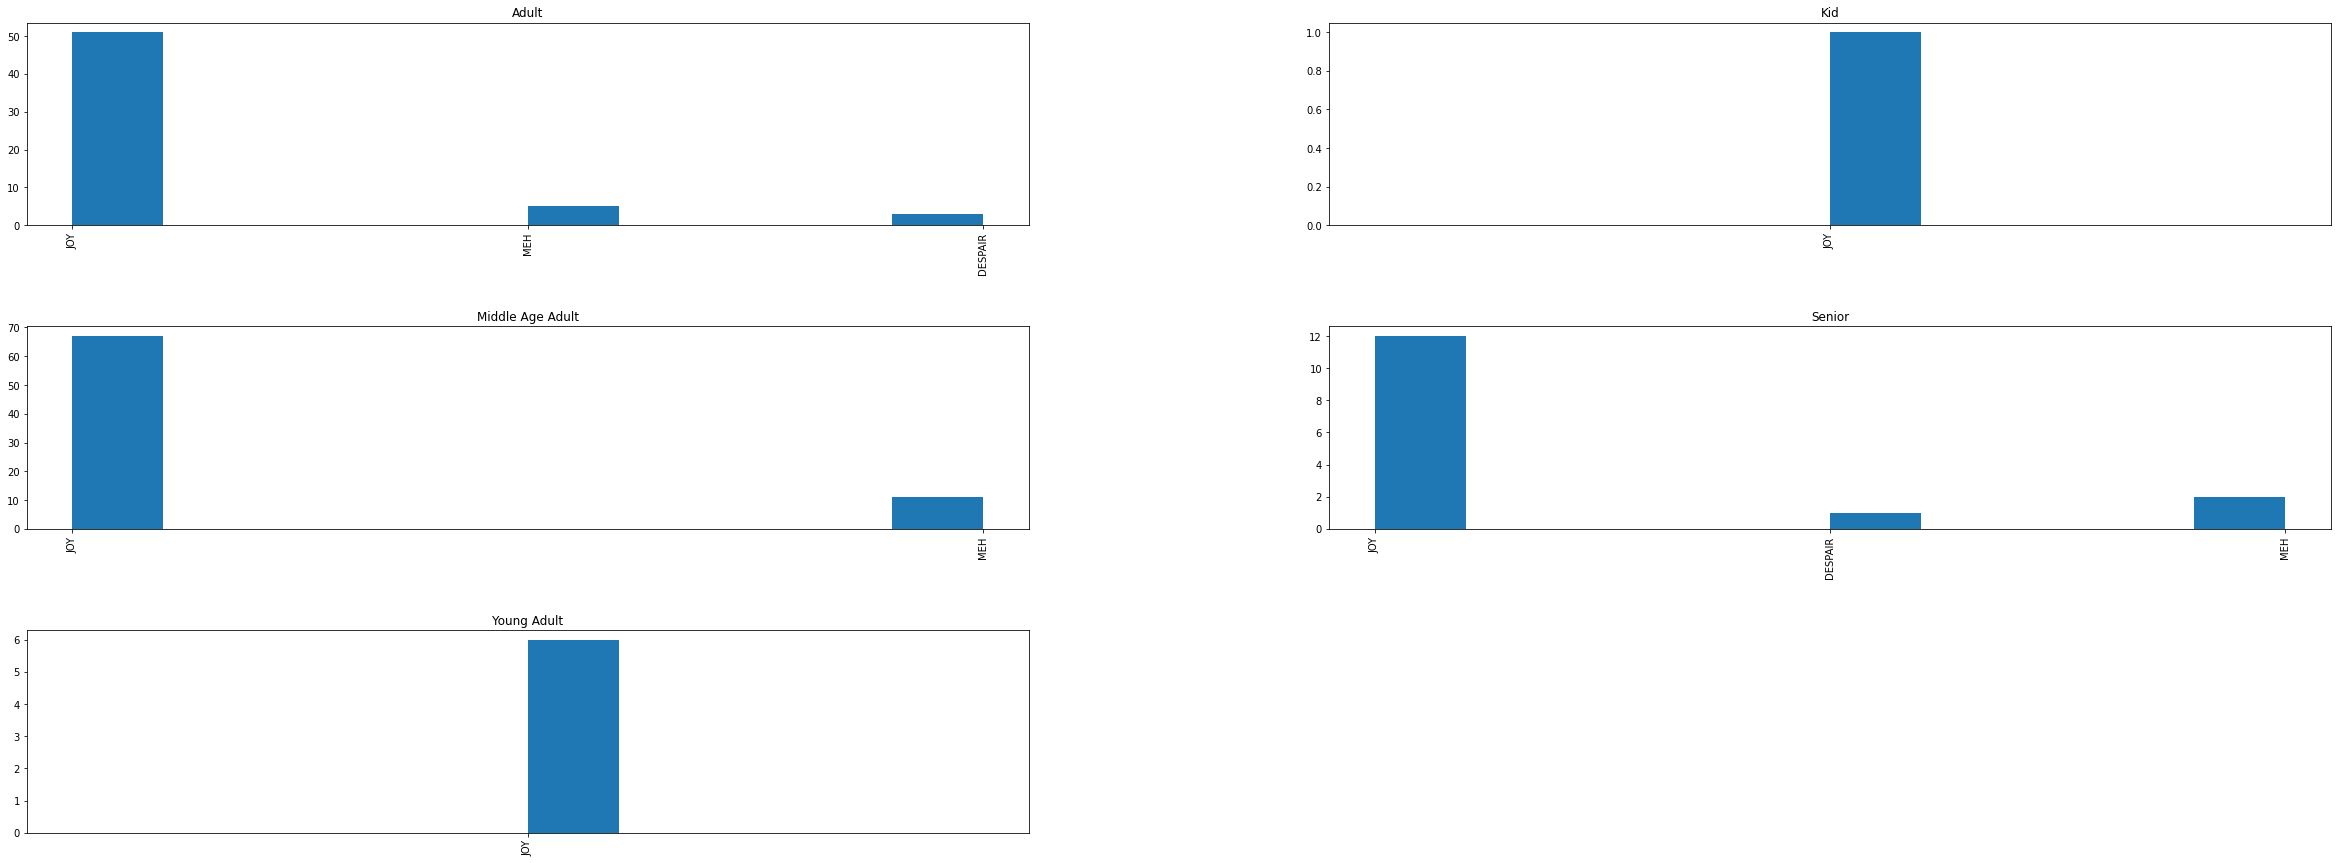

In [ ]:
fig = plt.figure(figsize=(40,15))
ax=fig.gca()
sample.hist(column='Kit Kat', by='age_group', ax=ax)

# Drinks Dataset
Needed because we're not able to apply most of the numerical calculations and preprocessing techniques with the Candy dataset. Drinks CSV file was manually dirtied up by deleting some values randomly.

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

filename_read2 = os.path.join(path,"drinks.csv")
drinksDF = pd.read_csv(filename_read2, na_values=['NA','?'])

# for test & splitting set
drinksNoProcessing = drinksDF

drinksDF.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,NaN,57.0,45.0,5.9,Africa


### Count of Continent Data

In [ ]:
print(drinksDF['continent'].value_counts().sort_values(ascending=False).head())

Africa           52
Asia             41
Europe           41
North America    22
Oceania          16
Name: continent, dtype: int64


### Handling Missing Values

In [ ]:
print('Number of missing values:')
print(drinksDF.isna().sum())

Number of missing values:
country                         12
beer_servings                   12
spirit_servings                 11
wine_servings                   11
total_litres_of_pure_alcohol     2
continent                       10
dtype: int64


### Filling in with Median for Numeric

In [ ]:
missing_median(drinksDF,'beer_servings')
missing_median(drinksDF,'spirit_servings')
missing_median(drinksDF,'wine_servings')
missing_median(drinksDF,'total_litres_of_pure_alcohol')

numDrinksView = drinksDF.filter(['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'])
print('Number of missing values after filling:')
print(numDrinksView.isna().sum())

Number of missing values after filling:
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64


### Dropping NaN Values for Non-Numeric Data

In [ ]:
print('Number of missing values (BEFORE):')
print(drinksDF.isna().sum())

drinksDF = drinksDF.dropna()

print('Number of missing values (AFTER):')
print(drinksDF.isna().sum())

Number of missing values (BEFORE):
country                         12
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       10
dtype: int64
Number of missing values (AFTER):
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


### PCA
This means that we can only have up to 3 principle components if we want cumulative proportion of variance to only go up to 98%.

In [ ]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(preprocessing.scale(drinksDF.iloc[:, 1:5].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                     'Proportion of variance': pcs.explained_variance_ratio_,
                     'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4
Standard deviation,1.6458,0.8913,0.6389,0.3351
Proportion of variance,0.6732,0.1974,0.1015,0.0279
Cumulative proportion,0.6732,0.8706,0.9721,1.0000


### Attribute Transformation
We made a copy of the original dataframe and normalized the values to help attribute comparisons for numeric data.

In [ ]:
from scipy.stats import zscore
normalizedDrinksDF = drinksDF
normalizedDrinksDF['beer_servings'] = zscore(normalizedDrinksDF['beer_servings'])
normalizedDrinksDF['spirit_servings'] = zscore(normalizedDrinksDF['spirit_servings'])
normalizedDrinksDF['wine_servings'] = zscore(normalizedDrinksDF['wine_servings'])
normalizedDrinksDF['total_litres_of_pure_alcohol'] = zscore(normalizedDrinksDF['total_litres_of_pure_alcohol'])
normalizedDrinksDF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,-1.042198,-0.892053,-0.610278,-1.249556,Asia
1,Albania,-0.154410,0.648176,0.067776,0.043359,Europe
2,Algeria,-0.792819,-0.892053,-0.434486,-1.064853,Africa
3,Andorra,1.401711,0.718187,3.307368,2.022311,Europe
4,Angola,-0.353913,-0.226954,-0.045233,0.307220,Africa


### Training/Test

In [ ]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
drinksNoProcessing['encoded_continent'] = encoder.fit_transform(drinksNoProcessing['continent'])
x_train, x_test, y_train, y_test = train_test_split(drinksNoProcessing[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], drinksNoProcessing['encoded_continent'], test_size=0.20, random_state=50)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(154, 4)
(154,)
(39, 4)
(39, 4)


### Standard Deviation and Mean of Test/Training Sets

In [ ]:
# couldn't apply std dev and mean to y datasets because their columns were weird
drinkNormalizerX = pd.DataFrame({'type':['x_train','x_test']})

# this table is too messy so not including in documentation. may be useful for future preprocessing work
def meanInputter(originalDF, newDF, chosenSet):
  for cols in originalDF[1:4]:
    newDF.loc[newDF['type'] == chosenSet, ('%s_mean' % cols)] = originalDF[cols].mean()

def stdDevInputter(originalDF, newDF, chosenSet):
  for cols in originalDF[1:4]:
    newDF.loc[newDF['type'] == chosenSet,('%s_std' % cols)] = originalDF[cols].std()

meanInputter(x_train,drinkNormalizerX, 'x_train')
meanInputter(x_test,drinkNormalizerX, 'x_test')
stdDevInputter(x_test,drinkNormalizerX, 'x_test')
stdDevInputter(x_train,drinkNormalizerX, 'x_train')

drinkNormalizerX.head()

,type,beer_servings_mean,spirit_servings_mean,wine_servings_mean,total_litres_of_pure_alcohol_mean,beer_servings_std,spirit_servings_std,wine_servings_std,total_litres_of_pure_alcohol_std
0,x_train,96.662338,77.012987,42.201299,4.544805,94.940038,86.377495,70.326910,3.661548
1,x_test,131.923077,81.025641,66.410256,5.574359,110.191313,80.985537,102.870311,4.036656


In [ ]:
x_trainSTD = x_train.std()
x_trainMean = x_train.mean()
x_testSTD = x_test.std()
x_testMean = x_test.mean()

print("STANDARD DEVIATIONS FOR EACH SET")
print("TRAINING:")
print(x_trainSTD)
print("TESTING:")
print(x_testSTD)

print("\nMEANS FOR EACH SET")
print("TRAINING:")
print(x_trainMean)
print("TESTING:")
print(x_testMean)

STANDARD DEVIATIONS FOR EACH SET
TRAINING:
beer_servings                   94.940038
spirit_servings                 86.377495
wine_servings                   70.326910
total_litres_of_pure_alcohol     3.661548
dtype: float64
TESTING:
beer_servings                   110.191313
spirit_servings                  80.985537
wine_servings                   102.870311
total_litres_of_pure_alcohol      4.036656
dtype: float64

MEANS FOR EACH SET
TRAINING:
beer_servings                   96.662338
spirit_servings                 77.012987
wine_servings                   42.201299
total_litres_of_pure_alcohol     4.544805
dtype: float64
TESTING:
beer_servings                   131.923077
spirit_servings                  81.025641
wine_servings                    66.410256
total_litres_of_pure_alcohol      5.574359
dtype: float64


In [ ]:
print('y_train mean: %d'% y_train.mean())
print('y_test mean: %d'%y_test.mean())

y_train mean: 1
y_test mean: 2
